### Assignment 2

In [1]:
import numpy as np
import pandas as pd
from bayes_opt import BayesianOptimization

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense


In [2]:
plt.style.use('seaborn')

### Load Dataset

In [3]:
df_diabetes = pd.read_csv('./diabetes.csv')

In [4]:
df_diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
print('Total rows:', df_diabetes.shape[0])
print('Total columns:', df_diabetes.shape[1])

Total rows: 768
Total columns: 9


### Check data Info

In [6]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df_diabetes.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

### Check Null Values

In [8]:
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df_diabetes_copy = df_diabetes.copy(deep=True)

In [10]:
df_diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [11]:
#checking sum of NaN value
print(df_diabetes_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


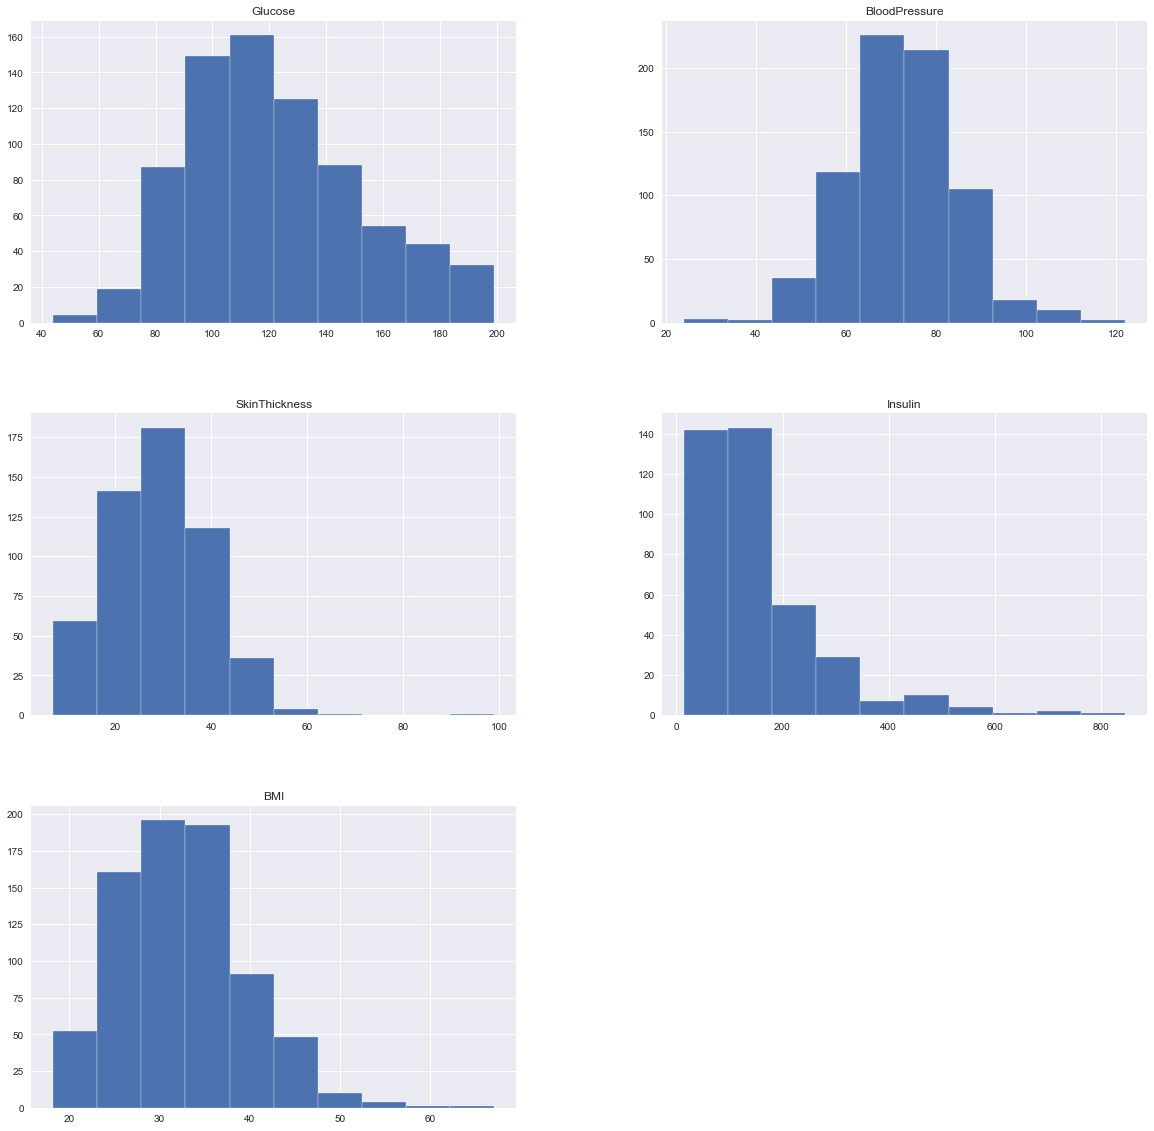

In [12]:
#checking distribution of each features ( before removing NaN )
p = df_diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].hist(figsize = (20,20))

In [13]:
#replacing NaN value
df_diabetes_copy['Glucose'].fillna(df_diabetes_copy['Glucose'].median(), inplace = True)
df_diabetes_copy['BloodPressure'].fillna(df_diabetes_copy['BloodPressure'].mean(), inplace = True)
df_diabetes_copy['SkinThickness'].fillna(df_diabetes_copy['SkinThickness'].median(), inplace = True)
df_diabetes_copy['Insulin'].fillna(df_diabetes_copy['Insulin'].median(), inplace = True)
df_diabetes_copy['BMI'].fillna(df_diabetes_copy['BMI'].median(), inplace = True)

### ploting after removal NaN value

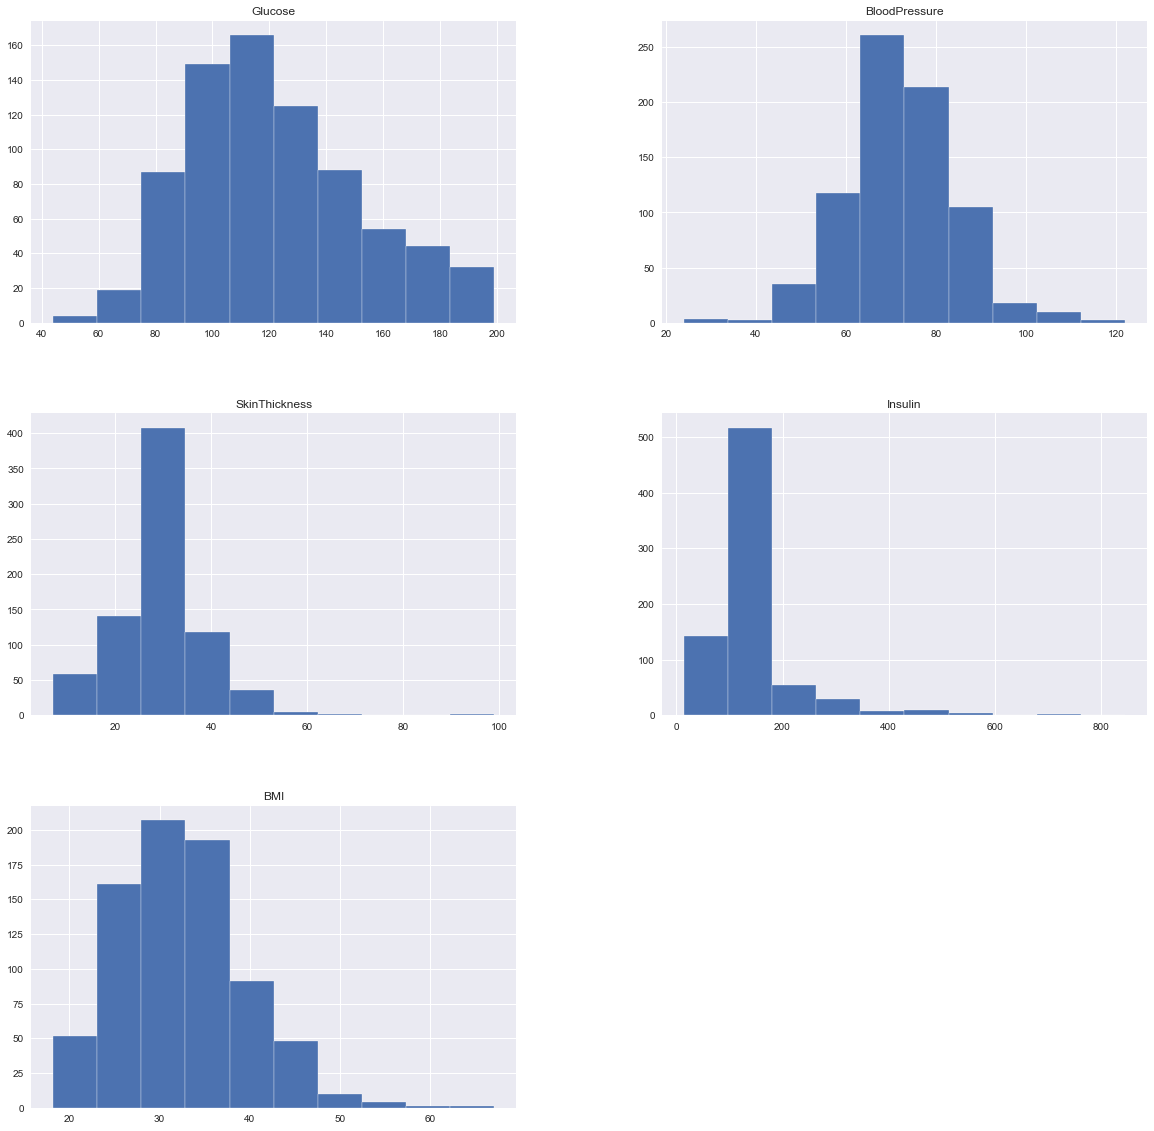

In [14]:
p = df_diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].hist(figsize = (20,20))

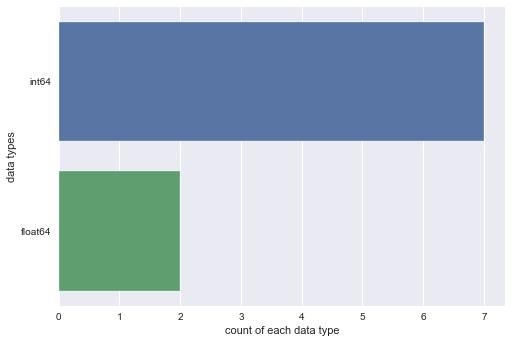

In [15]:
sns.countplot(y=df_diabetes.dtypes ,data=df_diabetes)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

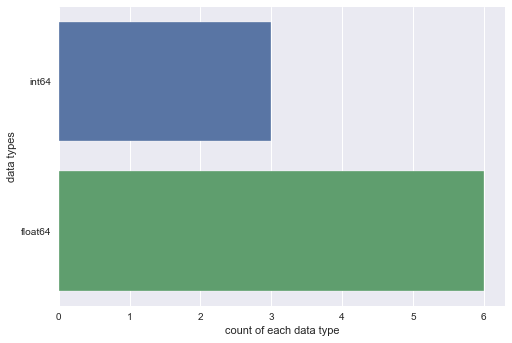

In [16]:
sns.countplot(y=df_diabetes_copy.dtypes ,data=df_diabetes)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

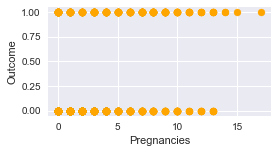

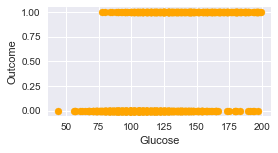

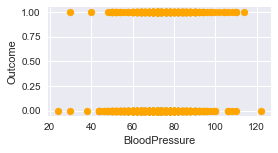

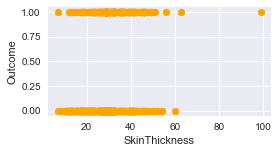

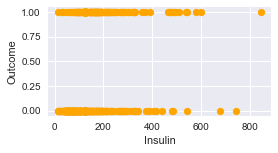

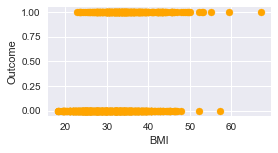

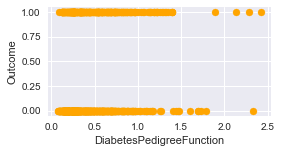

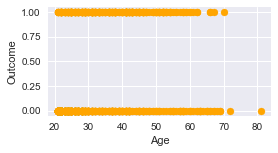

In [17]:
# Get the list of features (all columns except 'Outcome')
features = df_diabetes_copy.columns.drop('Outcome')

# Iterate over each feature and create a separate scatter plot
for feature in features:
    plt.figure(figsize=(4, 2))
    plt.scatter(df_diabetes_copy[feature], df_diabetes_copy['Outcome'], color='orange')
    plt.xlabel(feature)
    plt.ylabel('Outcome')
    plt.show()

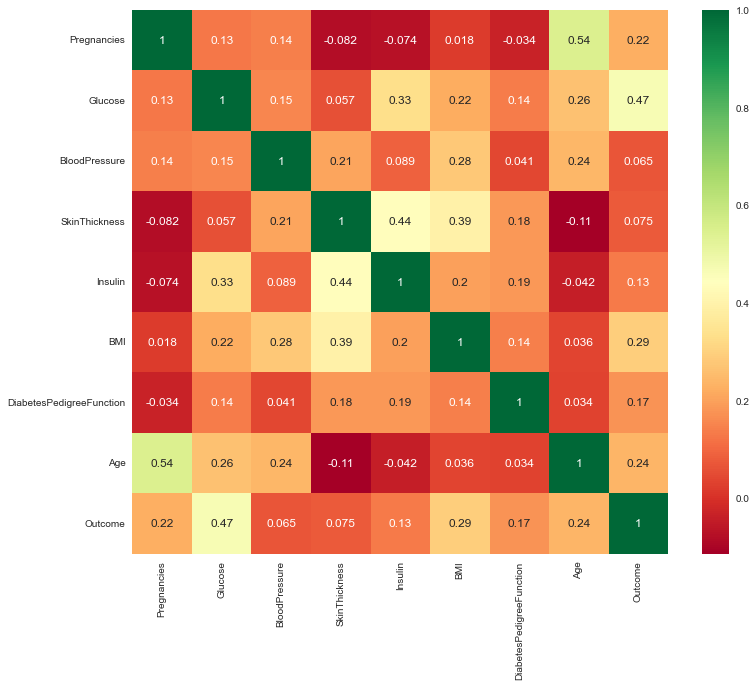

In [18]:
#heatmap for unclean data

plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df_diabetes.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

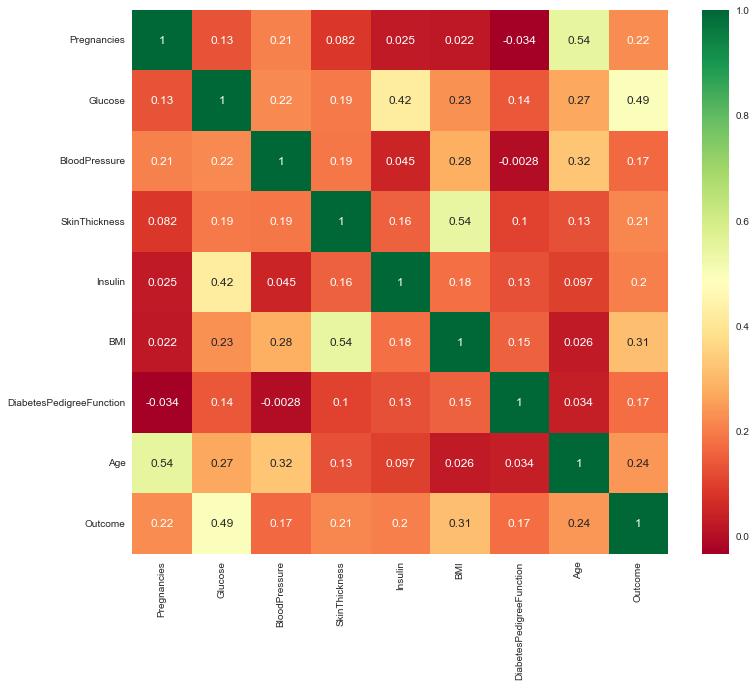

In [19]:
#heatmap for clean data
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df_diabetes_copy.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

### Split Dataset

In [20]:
features = df_diabetes_copy.values[:,:8]

In [21]:
labels =df_diabetes_copy.values[:,8:]

In [22]:
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size=0.2,random_state=42)

### Define Model

In [23]:
model = Sequential()

In [24]:
#build model
tf.keras.backend.clear_session()
model.add(Dense(12,input_dim=8,activation=tf.keras.layers.LeakyReLU()))
model.add(Dense(8,activation=tf.keras.layers.LeakyReLU()))
model.add(Dense(6,activation=tf.keras.layers.LeakyReLU()))
model.add(Dense(1,activation='sigmoid'))


In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy', tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall()])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,epochs=210,batch_size=8)

Epoch 1/210
77/77 [==============================] - 1s 2ms/step - loss: 1.4408 - accuracy: 0.4609 - precision: 0.2621 - recall: 0.3052
Epoch 2/210
77/77 [==============================] - 0s 2ms/step - loss: 0.8072 - accuracy: 0.5228 - precision: 0.2143 - recall: 0.1408
Epoch 3/210
77/77 [==============================] - 0s 2ms/step - loss: 0.7114 - accuracy: 0.5993 - precision: 0.2609 - recall: 0.0845  
Epoch 4/210
77/77 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.6450 - precision: 0.4561 - recall: 0.1221  
Epoch 5/210
77/77 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.6352 - precision: 0.4353 - recall: 0.1737
Epoch 6/210
77/77 [==============================] - 0s 2ms/step - loss: 0.6206 - accuracy: 0.6596 - precision: 0.5217 - recall: 0.2254  
Epoch 7/210
77/77 [==============================] - 0s 2ms/step - loss: 0.6222 - accuracy: 0.6678 - precision: 0.5464 - recall: 0.2488
Epoch 8/210
77/77 [=======================

77/77 [==============================] - 0s 2ms/step - loss: 0.5376 - accuracy: 0.7215 - precision: 0.6329 - recall: 0.4695
Epoch 61/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5449 - accuracy: 0.7166 - precision: 0.6291 - recall: 0.4460 
Epoch 62/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.7378 - precision: 0.6781 - recall: 0.4648
Epoch 63/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.7296 - precision: 0.6391 - recall: 0.5070  
Epoch 64/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5395 - accuracy: 0.7280 - precision: 0.6513 - recall: 0.4648
Epoch 65/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5285 - accuracy: 0.7329 - precision: 0.6503 - recall: 0.4977  
Epoch 66/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5457 - accuracy: 0.7280 - precision: 0.6420 - recall: 0.4883
Epoch 67/210
77/77 [=============================

77/77 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.7671 - precision: 0.7215 - recall: 0.5352
Epoch 120/210
77/77 [==============================] - 0s 2ms/step - loss: 0.4883 - accuracy: 0.7590 - precision: 0.6994 - recall: 0.5352
Epoch 121/210
77/77 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.7459 - precision: 0.6667 - recall: 0.5352
Epoch 122/210
77/77 [==============================] - 0s 2ms/step - loss: 0.4787 - accuracy: 0.7606 - precision: 0.6964 - recall: 0.5493
Epoch 123/210
77/77 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.7590 - precision: 0.6857 - recall: 0.5634
Epoch 124/210
77/77 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.7573 - precision: 0.6882 - recall: 0.5493
Epoch 125/210
77/77 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.7687 - precision: 0.7233 - recall: 0.5399
Epoch 126/210
77/77 [===========================

77/77 [==============================] - 0s 2ms/step - loss: 0.4584 - accuracy: 0.7834 - precision: 0.7469 - recall: 0.5681  
Epoch 179/210
77/77 [==============================] - 0s 2ms/step - loss: 0.4719 - accuracy: 0.7606 - precision: 0.7037 - recall: 0.5352
Epoch 180/210
77/77 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.7785 - precision: 0.7225 - recall: 0.5869  
Epoch 181/210
77/77 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.7785 - precision: 0.7225 - recall: 0.5869  
Epoch 182/210
77/77 [==============================] - 0s 2ms/step - loss: 0.4728 - accuracy: 0.7704 - precision: 0.7195 - recall: 0.5540
Epoch 183/210
77/77 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.7704 - precision: 0.7118 - recall: 0.5681
Epoch 184/210
77/77 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.7769 - precision: 0.7375 - recall: 0.5540
Epoch 185/210
77/77 [=====================

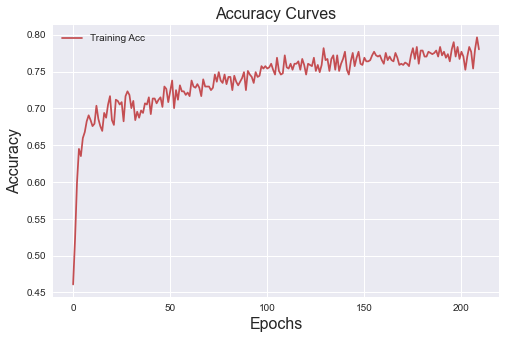

In [28]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['accuracy'], 'r')
plt.legend(['Training Acc'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

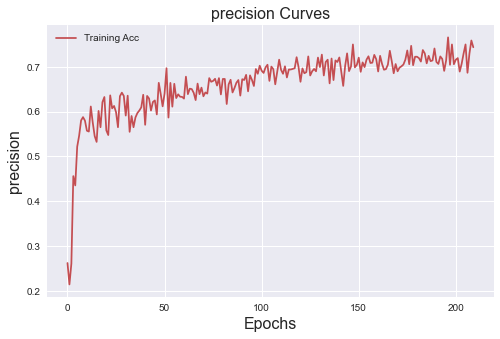

In [29]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['precision'], 'r')
plt.legend(['Training Acc'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('precision', fontsize=16)
plt.title('precision Curves', fontsize=16)

plt.show()

### Evaluate Model 

In [30]:
# evaluate the model
results = model.evaluate(X_test, y_test, verbose=False)
#extract
loss = results[0]
accuracy = results[1]
precision = results[2]
recall = results[3]
F1Score = 2 * (precision * recall) / (precision + recall)


print(f"Loss: {loss:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"precision: {precision:.2f}")
print(f"recall: {recall:.2f}")
print(f"F1Score: {F1Score:.2f}")



Loss: 0.52
Accuracy: 0.81
precision: 0.84
recall: 0.56
F1Score: 0.67


### Hyperparameter Tuning

### changing activation function (relu)

In [31]:
model = Sequential()

In [32]:
#build model
tf.keras.backend.clear_session()
model.add(Dense(12,input_dim=8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [33]:
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy', tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall()])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(X_train,y_train,epochs=210,batch_size=8)

Epoch 1/210
77/77 [==============================] - 1s 2ms/step - loss: 5.7355 - accuracy: 0.4577 - precision: 0.3429 - recall: 0.6150
Epoch 2/210
77/77 [==============================] - 0s 2ms/step - loss: 0.9319 - accuracy: 0.5391 - precision: 0.3138 - recall: 0.2770
Epoch 3/210
77/77 [==============================] - 0s 2ms/step - loss: 0.8634 - accuracy: 0.5554 - precision: 0.3454 - recall: 0.3146
Epoch 4/210
77/77 [==============================] - 0s 2ms/step - loss: 0.8300 - accuracy: 0.5896 - precision: 0.3934 - recall: 0.3380  
Epoch 5/210
77/77 [==============================] - 0s 2ms/step - loss: 0.7782 - accuracy: 0.5977 - precision: 0.4023 - recall: 0.3286
Epoch 6/210
77/77 [==============================] - 0s 2ms/step - loss: 0.7382 - accuracy: 0.6173 - precision: 0.4337 - recall: 0.3380  
Epoch 7/210
77/77 [==============================] - 0s 2ms/step - loss: 0.7031 - accuracy: 0.6189 - precision: 0.4371 - recall: 0.3427
Epoch 8/210
77/77 [=========================

77/77 [==============================] - 0s 2ms/step - loss: 0.5506 - accuracy: 0.7231 - precision: 0.6352 - recall: 0.4742
Epoch 61/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5458 - accuracy: 0.7345 - precision: 0.6736 - recall: 0.4554
Epoch 62/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5656 - accuracy: 0.7166 - precision: 0.6154 - recall: 0.4883  
Epoch 63/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5425 - accuracy: 0.7264 - precision: 0.6380 - recall: 0.4883
Epoch 64/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5351 - accuracy: 0.7182 - precision: 0.6299 - recall: 0.4554  
Epoch 65/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5421 - accuracy: 0.7280 - precision: 0.6369 - recall: 0.5023  
Epoch 66/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5354 - accuracy: 0.7378 - precision: 0.6605 - recall: 0.5023
Epoch 67/210
77/77 [============================

77/77 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.7492 - precision: 0.6879 - recall: 0.5070
Epoch 120/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5158 - accuracy: 0.7476 - precision: 0.6686 - recall: 0.5399  
Epoch 121/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5096 - accuracy: 0.7443 - precision: 0.6944 - recall: 0.4695
Epoch 122/210
77/77 [==============================] - 0s 1ms/step - loss: 0.4990 - accuracy: 0.7687 - precision: 0.7233 - recall: 0.5399
Epoch 123/210
77/77 [==============================] - 0s 1ms/step - loss: 0.4996 - accuracy: 0.7492 - precision: 0.6855 - recall: 0.5117
Epoch 124/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5023 - accuracy: 0.7459 - precision: 0.6770 - recall: 0.5117  
Epoch 125/210
77/77 [==============================] - 0s 1ms/step - loss: 0.5089 - accuracy: 0.7459 - precision: 0.6748 - recall: 0.5164  
Epoch 126/210
77/77 [=====================

77/77 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7720 - precision: 0.7135 - recall: 0.5728  
Epoch 179/210
77/77 [==============================] - 0s 2ms/step - loss: 0.4821 - accuracy: 0.7590 - precision: 0.6901 - recall: 0.5540
Epoch 180/210
77/77 [==============================] - 0s 2ms/step - loss: 0.4699 - accuracy: 0.7655 - precision: 0.7226 - recall: 0.5258  
Epoch 181/210
77/77 [==============================] - 0s 2ms/step - loss: 0.4701 - accuracy: 0.7638 - precision: 0.6954 - recall: 0.5681  
Epoch 182/210
77/77 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.7704 - precision: 0.7169 - recall: 0.5587  
Epoch 183/210
77/77 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.7720 - precision: 0.7267 - recall: 0.5493  
Epoch 184/210
77/77 [==============================] - 0s 1ms/step - loss: 0.4665 - accuracy: 0.7687 - precision: 0.7101 - recall: 0.5634  
Epoch 185/210
77/77 [===============

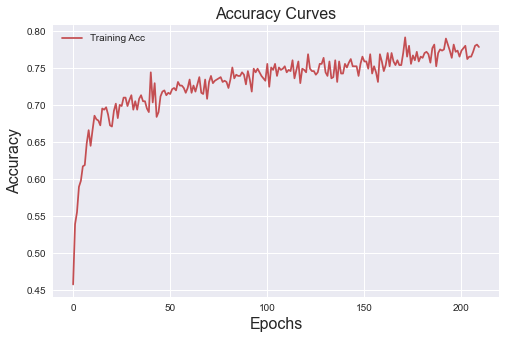

In [36]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['accuracy'], 'r')
plt.legend(['Training Acc'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

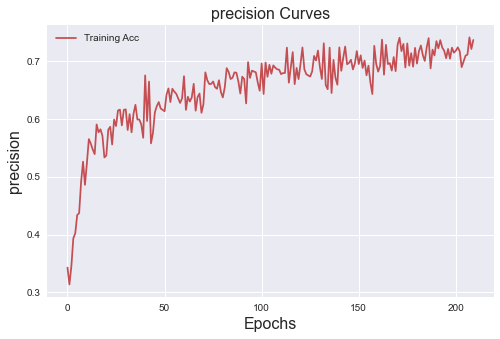

In [37]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['precision'], 'r')
plt.legend(['Training Acc'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('precision', fontsize=16)
plt.title('precision Curves', fontsize=16)

plt.show()

In [38]:
# evaluate the model
results = model.evaluate(X_test, y_test, verbose=False)
#extract
loss = results[0]
accuracy = results[1]
precision = results[2]
recall = results[3]
F1Score = 2 * (precision * recall) / (precision + recall)


print(f"Loss: {loss:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"precision: {precision:.2f}")
print(f"recall: {recall:.2f}")
print(f"F1Score: {F1Score:.2f}")



Loss: 0.53
Accuracy: 0.74
precision: 0.61
recall: 0.76
F1Score: 0.68


### changing activation function (Tanh)

In [39]:
model = Sequential()

#build model
tf.keras.backend.clear_session()
model.add(Dense(12,input_dim=8,activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy', tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall()])



In [40]:
model.fit(X_train,y_train,epochs=210,batch_size=8)

Epoch 1/210
77/77 [==============================] - 1s 2ms/step - loss: 0.8711 - accuracy: 0.4316 - precision: 0.3426 - recall: 0.6948
Epoch 2/210
77/77 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.6352 - precision: 0.4225 - recall: 0.1408
Epoch 3/210
77/77 [==============================] - 0s 2ms/step - loss: 0.6384 - accuracy: 0.6352 - precision: 0.4337 - recall: 0.1690  
Epoch 4/210
77/77 [==============================] - 0s 2ms/step - loss: 0.6336 - accuracy: 0.6352 - precision: 0.4337 - recall: 0.1690
Epoch 5/210
77/77 [==============================] - 0s 2ms/step - loss: 0.6276 - accuracy: 0.6417 - precision: 0.4186 - recall: 0.0845  
Epoch 6/210
77/77 [==============================] - 0s 2ms/step - loss: 0.6222 - accuracy: 0.6417 - precision: 0.2941 - recall: 0.0235   
Epoch 7/210
77/77 [==============================] - 0s 2ms/step - loss: 0.6269 - accuracy: 0.6531 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 8/210
77/77 [==============

77/77 [==============================] - 0s 2ms/step - loss: 0.6000 - accuracy: 0.6498 - precision: 0.2500 - recall: 0.0047  
Epoch 59/210
77/77 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.6531 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 60/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5949 - accuracy: 0.6531 - precision: 0.5000 - recall: 0.0047   
Epoch 61/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5955 - accuracy: 0.6498 - precision: 0.4000 - recall: 0.0188  
Epoch 62/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5975 - accuracy: 0.6531 - precision: 0.5000 - recall: 0.0047  
Epoch 63/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5998 - accuracy: 0.6498 - precision: 0.2500 - recall: 0.0047   
Epoch 64/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5937 - accuracy: 0.6531 - precision: 0.5000 - recall: 0.0094  
Epoch 65/210
77/77 [============

77/77 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.6531 - precision: 0.5000 - recall: 0.1127
Epoch 117/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5782 - accuracy: 0.6547 - precision: 0.6000 - recall: 0.0141   
Epoch 118/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.6596 - precision: 1.0000 - recall: 0.0188  
Epoch 119/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5793 - accuracy: 0.6547 - precision: 0.5556 - recall: 0.0235  
Epoch 120/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.6531 - precision: 0.5000 - recall: 0.0235  
Epoch 121/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5866 - accuracy: 0.6515 - precision: 0.4444 - recall: 0.0188  
Epoch 122/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.6564 - precision: 0.6667 - recall: 0.0188
Epoch 123/210
77/77 [================

77/77 [==============================] - 0s 2ms/step - loss: 0.5682 - accuracy: 0.6612 - precision: 1.0000 - recall: 0.0235
Epoch 175/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5679 - accuracy: 0.6531 - precision: 0.5000 - recall: 0.1502  
Epoch 176/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5728 - accuracy: 0.6596 - precision: 0.8333 - recall: 0.0235  
Epoch 177/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5706 - accuracy: 0.6612 - precision: 0.7778 - recall: 0.0329
Epoch 178/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5663 - accuracy: 0.6466 - precision: 0.4792 - recall: 0.2160  
Epoch 179/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5655 - accuracy: 0.6612 - precision: 0.5248 - recall: 0.2488
Epoch 180/210
77/77 [==============================] - 0s 2ms/step - loss: 0.5688 - accuracy: 0.6498 - precision: 0.4722 - recall: 0.0798  
Epoch 181/210
77/77 [===================

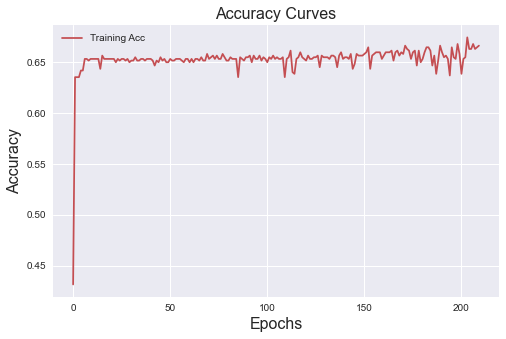

In [41]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['accuracy'], 'r')
plt.legend(['Training Acc'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

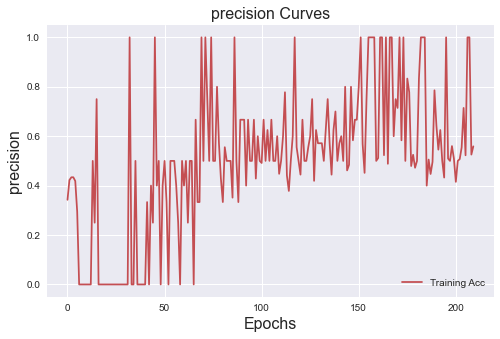

In [42]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['precision'], 'r')
plt.legend(['Training Acc'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('precision', fontsize=16)
plt.title('precision Curves', fontsize=16)

plt.show()

In [43]:
# evaluate the model
results = model.evaluate(X_test, y_test, verbose=False)
#extract
loss = results[0]
accuracy = results[1]
precision = results[2]
recall = results[3]
F1Score = 2 * (precision * recall) / (precision + recall)


print(f"Loss: {loss:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"precision: {precision:.2f}")
print(f"recall: {recall:.2f}")
print(f"F1Score: {F1Score:.2f}")



Loss: 0.63
Accuracy: 0.59
precision: 0.44
recall: 0.58
F1Score: 0.50


### Bayesian-Optimization

In [48]:
# Define the neural network architecture
tf.keras.backend.clear_session()
def create_model(learning_rate, num_hidden_layers, num_neurons):
    model = tf.keras.Sequential()
    for i in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(num_neurons, activation=tf.keras.layers.LeakyReLU()))
    model.add(tf.keras.layers.Dense(2, activation='sigmoid'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer,
              metrics=['accuracy', tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall()])
    return model

# Perform one-hot encoding on the true labels
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=2)

# Update the objective function to use the encoded labels
def objective(learning_rate, num_hidden_layers, num_neurons):
    model = create_model(learning_rate, int(num_hidden_layers), int(num_neurons))
    model.fit(X_train, y_train_encoded, epochs=210, validation_data=(X_test, y_test_encoded), verbose=0)
    val_loss, val_acc, val_prec,val_rec = model.evaluate(X_test, y_test_encoded, verbose=0)
    return val_acc

In [49]:
# Define the search space for hyperparameters
pbounds = {'learning_rate': (0.0001, 0.1),
           'num_hidden_layers': (1, 5),
           'num_neurons': (5, 50)}

In [50]:
# Perform Bayesian optimization
optimizer = BayesianOptimization(f=objective, pbounds=pbounds, verbose=2)
optimizer.maximize(init_points=8, n_iter=20)

|   iter    |  target   | learni... | num_hi... | num_ne... |
-------------------------------------------------------------
| 1         | 0.7922    | 0.01163   | 1.239     | 27.89     |
| 2         | 0.7532    | 0.01557   | 1.078     | 39.83     |
| 3         | 0.6688    | 0.09326   | 3.597     | 21.77     |
| 4         | 0.5714    | 0.01379   | 1.59      | 34.52     |
| 5         | 0.6429    | 0.08862   | 4.478     | 18.17     |
| 6         | 0.7403    | 0.003005  | 1.757     | 21.97     |
| 7         | 0.7727    | 0.00334   | 2.002     | 22.76     |
| 8         | 0.6429    | 0.09781   | 1.601     | 16.57     |
| 9         | 0.6818    | 0.005873  | 1.027     | 25.25     |
| 10        | 0.7338    | 0.01793   | 1.747     | 29.05     |
| 11        | 0.6558    | 0.04449   | 2.47      | 27.37     |
| 12        | 0.7078    | 0.02971   | 1.002     | 28.51     |
| 13        | 0.7338    | 0.06838   | 1.04      | 27.47     |
| 14        | 0.6494    | 0.09047   | 4.066     | 29.7      |
| 15    

In [51]:
# Print the optimized hyperparameters and validation accuracy
print('Optimized hyperparameters:')
print(optimizer.max['params'])
print('Validation accuracy: {:.2f}%'.format(optimizer.max['target'] * 100))

Optimized hyperparameters:
{'learning_rate': 0.011631371491713666, 'num_hidden_layers': 1.2393636247459523, 'num_neurons': 27.89137026038525}
Validation accuracy: 79.22%
